### ⭐ What is a Generator?
👉 A generator is like a machine that gives values one-by-one instead of creating everything at once.

📦 Normal function
Returns everything at once   
→ consumes more memory  

🚰 Generator  
Gives one value at a time  
→ uses very little memory  
→ faster for huge data  

What is yield in Python?
- yield is like return, but for generators.
- Instead of returning all results at once, it produces one value at a time.
- When the function is called again, it resumes where it left off.

Think of yield like a water tap:
- return → fills a whole bucket at once
- yield → gives you a cup at a time, you can use it immediately, then take the next

- 📌 return → gives final result
- 📌 yield → gives one value, waits… then continues

| Task              | List                | Generator               |
| ----------------- | ------------------- | ----------------------- |
| Store many values | uses lots of memory | uses almost zero memory |
| Large loops       | slow                | fast                    |
| Infinite loops    | ❌ impossible        | ✅ possible              |


👉 next() is used to get the next value from a generator.

### 🧩 Smallest Generator Example

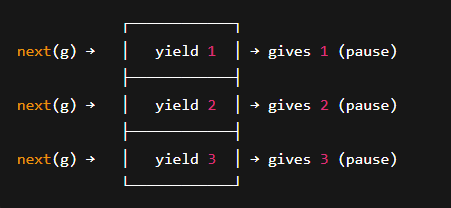

In [24]:
def gen():
    yield 1
    yield 2
    yield 3
    yield 4
g = gen()
print(next(g))  # 1
print(next(g))  # 2
print(next(g))  # 3
print(next(g))  # 4



1
2
3
4


### Generator for numbers divisible by 7 up to n

🧠 What the Code Does  
Loops from i = 0 to n  
Checks if i % 7 == 0 → divisible by 7  
yield returns numbers one by one  
list(...) collects all yielded numbers into a list  

| Step | i  | Condition `i % 7 == 0` | Action | Yielded Value | Collected List |
| ---- | -- | ---------------------- | ------ | ------------- | -------------- |
| 1    | 0  | 0 % 7 = 0 → ✅          | yield  | 0             | [0]            |
| 2    | 1  | 1 % 7 = 1 → ❌          | skip   | —             | [0]            |
| 3    | 2  | 2 % 7 = 2 → ❌          | skip   | —             | [0]            |
| 4    | 3  | 3 % 7 = 3 → ❌          | skip   | —             | [0]            |
| 5    | 4  | 4 % 7 = 4 → ❌          | skip   | —             | [0]            |
| 6    | 5  | 5 % 7 = 5 → ❌          | skip   | —             | [0]            |
| 7    | 6  | 6 % 7 = 6 → ❌          | skip   | —             | [0]            |
| 8    | 7  | 7 % 7 = 0 → ✅          | yield  | 7             | [0, 7]         |
| 9    | 8  | 8 % 7 = 1 → ❌          | skip   | —             | [0, 7]         |
| 10   | 9  | 9 % 7 = 2 → ❌          | skip   | —             | [0, 7]         |
| 11   | 10 | 10 % 7 = 3 → ❌         | skip   | —             | [0, 7]         |


In [ ]:
def gen_div7(n):
    for i in range(n+1):# i=0
        if i % 7 == 0: # 0 % 7 = 0 → ✅ 
            yield i #0

print(list(gen_div7(10)))

[0, 7]


### Infinite generator for odd numbers


### 🧠 What the Code Does

- infinite_odds() generates odd numbers forever starting from 1
- yield x gives one number at a time
- x += 2 moves to the next odd number
- next(g) fetches the next yielded value
- for _ in range(5) → prints first 5 odd numbers

while True: → infinite loop   
yield → pauses function and returns one value at a time  
next(g) → resumes the generator from where it left off   
You can stop anytime, it doesn’t generate all numbers at once 

| Step | x (Current Value) | Action | Yielded Value | Next x |
| ---- | ----------------- | ------ | ------------- | ------ |
| 1    | 1                 | yield  | 1             | 3      |
| 2    | 3                 | yield  | 3             | 5      |
| 3    | 5                 | yield  | 5             | 7      |
| 4    | 7                 | yield  | 7             | 9      |
| 5    | 9                 | yield  | 9             | 11     |


In [ ]:
def infinite_odds():
    x = 1
    while True:
        yield x
        x += 2
g = infinite_odds()
for _ in range(5): # 1st five odd num
    print(next(g))

1
3
5
7
9


### Read file line by line using generator

#### What This Code Does
Opens a file  
Reads one line at a time  
yield returns each line without storing the whole file in memory  
.strip() removes newline characters (\n)  

| Step | File Line Read | After `.strip()` | `yield` Output | Generator Status    |
| ---- | -------------- | ---------------- | -------------- | ------------------- |
| 1    | "apple\n"      | "apple"          | apple          | Paused after line 1 |
| 2    | "banana\n"     | "banana"         | banana         | Paused after line 2 |
| 3    | "cherry\n"     | "cherry"         | cherry         | Paused after line 3 |
| 4    | End of file    | —                | StopIteration  | Generator ends      |


In [30]:
def read_file_gen(path):
    with open('sample.txt','r') as f:
        for line in f:
            yield line.strip()
# Example placeholder: requires a real file path
for line in read_file_gen('sample.txt'):
    print(line)

apple
banana
cherry


### Iterate nested lists of unknown depth

| Step | nested list         | item        | Action                 |
| ---- | ------------------- | ----------- | ---------------------- |
| 1    | `[1, [2,3], ...]`   | `1`         | Not a list → `yield 1` |
| 2    | `[1, [2,3], ...]`   | `[2,3]`     | List → go inside loop  |
| 3    | Flatten `[2,3]`     | `2`         | yield `2`              |
| 4    | Flatten `[2,3]`     | `3`         | yield `3`              |
| 5    | Back to main list   | `[4,[5,6]]` | List → go inside       |
| 6    | Flatten `[4,[5,6]]` | `4`         | yield `4`              |
| 7    | Flatten `[4,[5,6]]` | `[5,6]`     | List → go inside       |
| 8    | Flatten `[5,6]`     | `5`         | yield `5`              |
| 9    | Flatten `[5,6]`     | `6`         | yield `6`              |


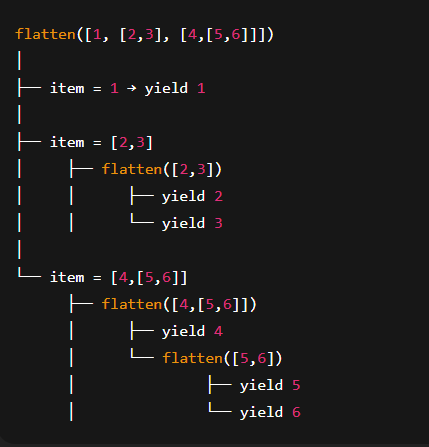

In [31]:
def flatten(nested):
    for item in nested:
        if isinstance(item, list):
            for value in flatten(item):   # <- this is what "yield from" actually does
                yield value #2,3
        else:
            yield item #1
print(list(flatten([1,[2,3],[4,[5,6]]])))

[1, 2, 3, 4, 5, 6]


### Yield Fibonacci sequence using generator

| Step | a (before yield) | b (before yield) | Yield output | New a after update | New b after update |
| ---- | ---------------- | ---------------- | ------------ | ------------------ | ------------------ |
| 1    | 0                | 1                | 0            | 1                  | 1 (0+1)            |
| 2    | 1                | 1                | 1            | 1                  | 2 (1+1)            |
| 3    | 1                | 2                | 1            | 2                  | 3 (1+2)            |
| 4    | 2                | 3                | 2            | 3                  | 5 (2+3)            |
| 5    | 3                | 5                | 3            | 5                  | 8 (3+5)            |


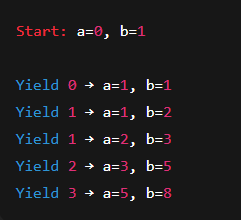

In [33]:
def fib_gen(n):
    a,b = 0,1
    for _ in range(n):
        yield a
        a, b = b, a+b
print(list(fib_gen(5)))

[0, 1, 1, 2, 3]


### Generator to yield squares of numbers

| Step | Current x | Operation | Yielded Value | Output So Far |
| ---- | --------- | --------- | ------------- | ------------- |
| 1    | 1         | 1 × 1     | 1             | [1]           |
| 2    | 2         | 2 × 2     | 4             | [1, 4]        |
| 3    | 3         | 3 × 3     | 9             | [1, 4, 9]     |
| 4    | 4         | 4 × 4     | 16            | [1, 4, 9, 16] |


In [34]:
def squares(nums):
    for x in nums: #x =1,2,3
        yield x*x
print(list(squares([1,2,3,4])))

[1, 4, 9, 16]


### Generator to yield unique elements from list

| Step | x (Current Element) | Seen Before | Condition `x not in seen` | Action      | Seen After | Yielded | Collected List |
| ---- | ------------------- | ----------- | ------------------------- | ----------- | ---------- | ------- | -------------- |
| 1    | 1                   | {}          | True                      | Add & yield | {1}        | 1       | [1]            |
| 2    | 2                   | {1}         | True                      | Add & yield | {1,2}      | 2       | [1,2]          |
| 3    | 2                   | {1,2}       | False                     | Skip        | {1,2}      | —       | [1,2]          |
| 4    | 3                   | {1,2}       | True                      | Add & yield | {1,2,3}    | 3       | [1,2,3]        |
| 5    | 3                   | {1,2,3}     | False                     | Skip        | {1,2,3}    | —       | [1,2,3]        |
| 6    | 4                   | {1,2,3}     | True                      | Add & yield | {1,2,3,4}  | 4       | [1,2,3,4]      |


In [37]:
def unique_gen(lst):
    seen = set()
    for x in lst:
        if x not in seen:
            seen.add(x)
            yield x
print(list(unique_gen([1,2,2,3,3,4])))

[1, 2, 3, 4]


### Generator that yields sliding window of size k

| Step | i (start index) | Slice `seq[i:i+k]` | Yielded Window | Collected List            |
| ---- | --------------- | ------------------ | -------------- | ------------------------- |
| 1    | 0               | seq[0:3]=[1,2,3]            | [1,2,3]        | [[1,2,3]]                 |
| 2    | 1               | seq[1:4]=[2,3,4]            | [2,3,4]        | [[1,2,3],[2,3,4]]         |
| 3    | 2               | seq[2:5]=[3,4,5]            | [3,4,5]        | [[1,2,3],[2,3,4],[3,4,5]] |


In [38]:
def sliding_window(seq,k):
    for i in range(len(seq) - k+1): #5-3+1=3=>i=0,1,2
        yield seq[i:i+k]

print(list(sliding_window([1,2,3,4,5],3)))

[[1, 2, 3], [2, 3, 4], [3, 4, 5]]


### Generator that yields chunks of string

| Step | i (start index) | Slice `s[i:i+k]` | Yielded Chunk | Collected List     |
| ---- | --------------- | ---------------- | ------------- | ------------------ |
| 1    | 0               | s[0:3] → "abc"   | "abc"         | ["abc"]            |
| 2    | 3               | s[3:6] → "def"   | "def"         | ["abc","def"]      |
| 3    | 6               | s[6:9] → "gh"    | "gh"          | ["abc","def","gh"] |


In [39]:
def chunk_string(s,k):
    for i in range(0, len(s), k): #range(0,8,3)=> i =0,3,6
        yield s[i:i+k]

print(list(chunk_string("abcdefgh",3)))

['abc', 'def', 'gh']


### Generator that yields reversed string one char at a time

| Step | i (index) | s[i] (character) | yield value | Collected Output |
| ---- | --------- | ---------------- | ----------- | ---------------- |
| 1    | 4         | `'o'`            | o           | "o"              |
| 2    | 3         | `'l'`            | l           | "ol"             |
| 3    | 2         | `'l'`            | l           | "oll"            |
| 4    | 1         | `'e'`            | e           | "olle"           |
| 5    | 0         | `'h'`            | h           | "olleh"          |


In [40]:
def reverse_gen(s):
    for i in range(len(s)-1, -1, -1): #range(4,-1,-1)
        yield s[i]   
print(''.join(reverse_gen("hello")))

olleh
